### Data Representation for Neural Networks
Data stored in multidimensional Numpy Arrays ==> Tensors
Number of dimensions is often called an _axis_

*Terms*
* Rank / Number of Axes: also called tensors ndim. This is what you normally think of dimensionality in arrays
* Shape: Tuple of integers that describes how many dimensions the tensor has along each axis e.g. matrix (3, 5) or 3D tensor of the shape (3, 3, 5)
* Data Type: type of data contained in the tensor. Float32, uint8, Float64, occassionally char

In [1]:
# Scalers 0-D Tensors
# float32 or float64
import numpy as np
x = np.array(12)
print(x)
x.ndim

12


0

In [2]:
# Vectors (1-D tensors)
# This is a 5-DIMENSIONAL VECTOR
x = np.array([12, 3, 6, 14])
print(x)
x.ndim

[12  3  6 14]


1

In [3]:
# Matrices (2D tensors)
# 2 axis - rows and columns
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print(x)
x.ndim

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]


2

In [4]:
# 3+ Dimensional Tensors
#x = np.array([[[5, 78, 2, 34, 0],
#               [6, 79, 3, 35, 1],
#               [7, 80, 4, 36, 2],
#              [[5, 78, 2, 34, 0].....]]])
# Basically it's just nesting arrays within arrays. It's a little awkwardly visualized in the book and above 
# and with numpy in general I guess

3
(60000, 28, 28)
uint8


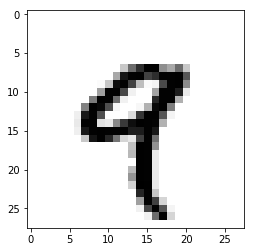

In [6]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) =  mnist.load_data()
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [7]:
# 2.2.6: Manipulating Tensors
# Slices images 10-100 (100 not included)
print(f"Train images overall shape is {train_images.shape}")
print("Now three equivalents ways to slice images 10-100")
my_slice = train_images[10:100]
print(my_slice.shape)
print(train_images[10:100, :, :].shape)
print(train_images[10:100, 0:28, 0:28].shape)

print('More examples like train_images[:, 14:, 14:]')
print(train_images[:, 14:, 14:].shape)

print('Negative indices - as you know')
print(train_images[:, 7:-7, 7:-7].shape)

Train images overall shape is (60000, 28, 28)
Now three equivalents ways to slice images 10-100
(90, 28, 28)
(90, 28, 28)
(90, 28, 28)
More examples like train_images[:, 14:, 14:]
(60000, 14, 14)
Negative indices - as you know
(60000, 14, 14)


### Data Batches
First axis - Axis 0 - will be the samples axis- In the MNIST: the samples are digits
AKA _batch axis_ or _batch dimension_

Deep learning models don't process an entire dataset at once (full gradient descent)
Instead they process data in small batches

In [8]:
batch = train_images[:128]
batch = train_images[128:256]
n=2
batch = train_images[128 * n:128 * (n+1)]

# Real World Data Tensors
Vector Data: 2D tensors of shape (samples, features) 
Samples X Features
Each single data point can be encoded as a vectore, batch of data will be encoded as a 2D tensor (array of vectors). 1st axis is samples axis, 2nd axis is features axis
* Ex1: Each person can be charcterized as a vector of 3 values: age, zip code, income. There are 100,000 people. This can be stored as a 2D tensor of shape (100000, 3)
* Ex2: Dataset of text docs, each doc represented by the counds of how many times each word appears out of a dictionary of 20,000 common words. Each doc encoded as a vector of 20,000 values (one count per word in the dict). The entire dataset of 500 documents can be stored as a tensor of shape (500, 20000)


Timeseries data or sequence data: 3D tensors of shape (samples, timesteps, features)
Samples X Timesteps X Features. Time axis is ALWAYS THE SECOND AXIS.
* Ex1: Dataset of stock prices. Every minute, stored the current price of the stock. The highest price in the last minute, the lowest price in the last minute. Every day is encoded as a 2D tensor of shape (390, 3) where 390 is the minutes in a trading day. 250 days would be encoded into a 3d tensor (250, 390, 3).
* Ex2: Tweets. 280 char limit, Each char encoded as a binary vect of size 128 (ONE HOT ENCODED chars). Each tweet encoded as a 2D tensor (280, 128). 1M tweets encoded to (1M, 280, 128)


Images: 4D tensors of shape (samples, height, width, channels) OR (samples, channels, height, width)
* Ex1: Batch of greyscale images: 128 greyscale images of size 256 x 256 stored into (128, 256, 256, 1) where the 1 is the single color channel. 
* Ex2: 128 color 256x256 images could be stored in a tensor of shape (128, 256, 256, 3). Where 3 is the RGB channel (I assume).
CONVENTION: Channel-last (tensorflow) - (samples, height, width, color_depth). Channel-first (theano) (samples, color_depth, height, width).

Video: 5D tensors of shape (samples, frames, height, width, channels) OR (samples, frames, channels, height, width)
* Ex1: 60-second, 144 x 256 YouTube clip sampled at 4 fps would have 240 frames. (4, 240, 144, 256, 3) Total of 105,168,320 values! In float32 = 405 mB. Real videos are compressed by large factor (e.x. MPEG).

# Tensor Operations
keras.layers.Dense(512, activation='relu') 
W is a 2-D tensor, and b is a vector - both layer attributes
output = relu(dot(W, input) + b)
W DOT INPUT --> Dot Product
+ B --> Matrix Addition
relu(x) --> max (x,0)

In [9]:
# Naive Python Implentation in a for loop
# Relu activation function 
def naive_relu(x):
    assert len(x.shape) == 2 #x is a 2D numpy tensor
    x = x.copy() #don't overwrite input tensor
    for i in range(x.shape[0]): #for each sample
        for j in range(x.shape[1]): #for each feature
            x[i, j] = max(x[i, j], 0)
    return x

# element wise addition
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [10]:
# Real world - use BLAS: Basic Linear Algebra Subprograms
np.__config__.show()

blas_mkl_info:
  NOT AVAILABLE
blis_info:
  NOT AVAILABLE
openblas_info:
    library_dirs = ['C:\\projects\\numpy-wheels\\numpy\\build\\openblas']
    libraries = ['openblas']
    language = f77
    define_macros = [('HAVE_CBLAS', None)]
blas_opt_info:
    library_dirs = ['C:\\projects\\numpy-wheels\\numpy\\build\\openblas']
    libraries = ['openblas']
    language = f77
    define_macros = [('HAVE_CBLAS', None)]
lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
    library_dirs = ['C:\\projects\\numpy-wheels\\numpy\\build\\openblas']
    libraries = ['openblas']
    language = f77
    define_macros = [('HAVE_CBLAS', None)]
lapack_opt_info:
    library_dirs = ['C:\\projects\\numpy-wheels\\numpy\\build\\openblas']
    libraries = ['openblas']
    language = f77
    define_macros = [('HAVE_CBLAS', None)]


I don't have BLAS 
But if it turns out I absolutely need it
http://scipy.github.io/devdocs/building/windows.html

In [12]:
# Real world numpy implementation
# import numpy as np
# z = x + y
# z = np.maximum(z, 0)

### Broadcasting
Consider X (32, 10), & Y (10 ,)

Procedure:
1. Add empty first axis to Y (1, 10)
2. Repeat Y 32 times (32, 10). Ending up with Y[i, :] = Y for i in range(0, 32)
3. Now you can add X + Y

Generally apply if one tensor has shape (a, b, ...n, n+1, ...m) and other tensor has shape (n, n+1, ... m)

In [14]:
# naive implementation
def naive_add_matrix_and_vector(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [17]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y) #this will BROADCAST y to the shape of x

print(z.shape)


(64, 3, 32, 10)

### Tensor Dot

```import numpy as np
z = np.dot(x, y) ```

In [20]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

### or better yet!

def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot([x[i, :], y])
    return z

### now for arbritary number of axes
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0], y.shape[1])
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### DOT PRODUCT SHAPE COMPATIBILITY
x.shape: (a, b)

y.shape: (b, c)

(a, b, c, d) DOT (d,) --> (a, b, c)
(a, b, c, d) DOT (d, e) --> (a, b, c, e)
(a, b, c, d) DOT (d, e, f) --> (a, b, c, f) ???

In [23]:
### Tensor Reshaping
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))

x = np.array([[0., 1.],
            [2., 3.],
            [4., 5.]])
print(x.shape)
x = x.reshape((6, 1))
print(x.shape)
x

(3, 2)
(6, 1)


array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [24]:
# Transpose - flip rows and columns duh
x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

(20, 300)


### Momentum
Mental image: optimization process as a small ball rolling down the loss curve. If it has enough momentum, the ball won't get stuck in a ravine and will end up at the global minimum. Momentum is implemented by moving the ball at each step based not only on the current slope value (current acceleration) but also on the current velocity (result of past acceleration). In practice this means updating the parameter w based not only on the current gradient value but also the previous parameter update.

In [26]:
def naive_momentum:
    past_velocity = 0.
    momentum = 0.1
    while loss > 0.01:
        w, loss, gradient = get_current_parameters()
        velocity = past_velocity * momentum + learning_rate * gradient
        w = w + momentum * velocity - learning_rate * gradient
        past_velocity = velocity
        update_parameter(w)

### Backpropogation 
AKA reverse-mode differentiation
Backpropogation starts with final loss value and works backward from thetop layers to the bottom layers, applying the chain rule, to compute the contribution that each parameter had in the loss value.


### Looking again at MNIST

In [42]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [43]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
network.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels), batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0050 - acc: 0.9986 - val_loss: 0.0729 - val_acc: 0.9838
Epoch 2/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0037 - acc: 0.9990 - val_loss: 0.0773 - val_acc: 0.9831
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0030 - acc: 0.9993 - val_loss: 0.0804 - val_acc: 0.9818
Epoch 4/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0024 - acc: 0.9995 - val_loss: 0.0932 - val_acc: 0.9805
Epoch 5/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0020 - acc: 0.9995 - val_loss: 0.0880 - val_acc: 0.9821
Epoch 6/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0017 - acc: 0.9995 - val_loss: 0.0956 - val_acc: 0.9811
Epoch 7/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0012 - acc: 0.9997 - val_loss: 0.0958 - val_acc